In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
data['Gender']=a.fit_transform(data['Gender'])
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [3]:
correlation_matrix=data.corr()
print(correlation_matrix)

                        CustomerID    Gender       Age  Annual Income (k$)  \
CustomerID                1.000000  0.057400 -0.026763            0.977548   
Gender                    0.057400  1.000000  0.060867            0.056410   
Age                      -0.026763  0.060867  1.000000           -0.012398   
Annual Income (k$)        0.977548  0.056410 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.058109 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Gender                               -0.058109  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


<Axes: >

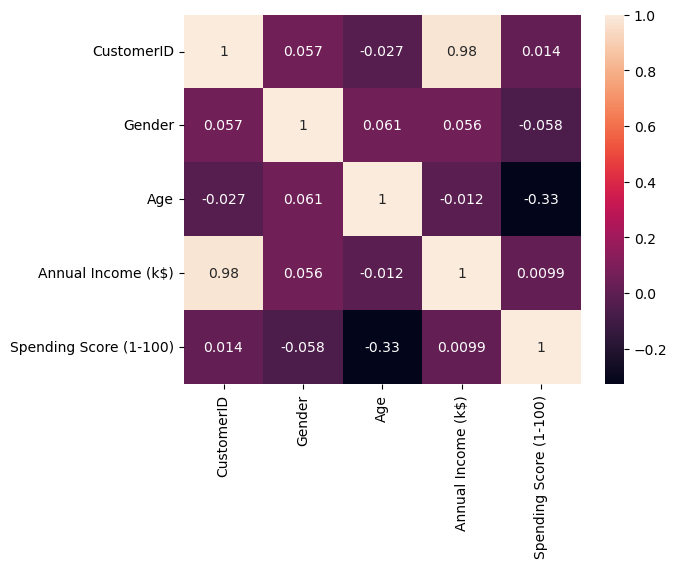

In [4]:
import seaborn as sns
sns.heatmap(correlation_matrix,annot=True)

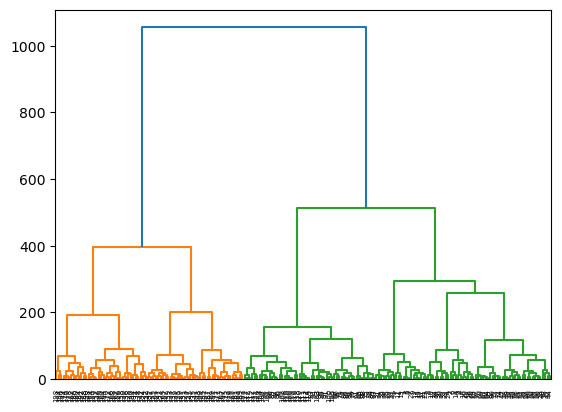

In [5]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(data,method='ward',metric='euclidean'))
from sklearn.cluster import AgglomerativeClustering
d_cluster=AgglomerativeClustering(n_clusters=5)
b=d_cluster.fit(data)
c=d_cluster.fit_predict(data)

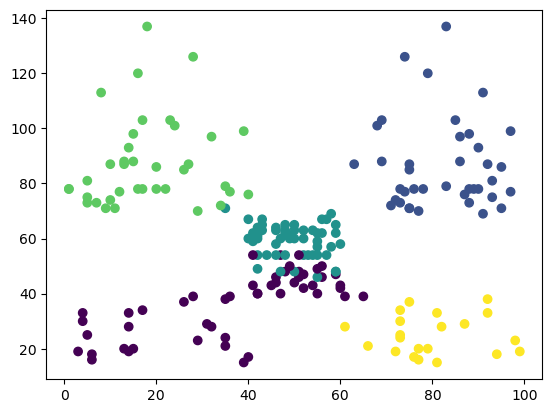

In [9]:
plt.scatter(data['Spending Score (1-100)'],data['Annual Income (k$)'],c=c)

In [7]:
#Model valuation---ROC curve
#Model Evaluation----Accuracy